In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("all_data.csv")

In [3]:
data.head()

,AnalogValue,Density,Amplitude,Result
0,587,579,0.72,0
1,589,592,0.72,0
2,605,603,0.74,0
3,624,627,0.76,0
4,622,622,0.76,0


In [4]:
upper = data.iloc[:100, :]
upper.head()

,AnalogValue,Density,Amplitude,Result
0,587,579,0.72,0
1,589,592,0.72,0
2,605,603,0.74,0
3,624,627,0.76,0
4,622,622,0.76,0


In [5]:
down = data.iloc[200:300, :]
down.tail()

,AnalogValue,Density,Amplitude,Result
295,820,807,1.00,1
296,796,795,0.97,1
297,779,779,0.95,1
298,768,774,0.94,1
299,756,755,0.92,1


In [6]:
right = data.iloc[400:500,:]
right.tail()

,AnalogValue,Density,Amplitude,Result
495,240,235,0.29,2
496,240,240,0.29,2
497,225,227,0.27,2
498,215,211,0.26,2
499,208,208,0.25,2


In [7]:
left = data.iloc[600:700,:]
left.tail()

,AnalogValue,Density,Amplitude,Result
695,656,663,0.80,3
696,671,672,0.82,3
697,675,669,0.82,3
698,678,676,0.83,3
699,677,679,0.83,3


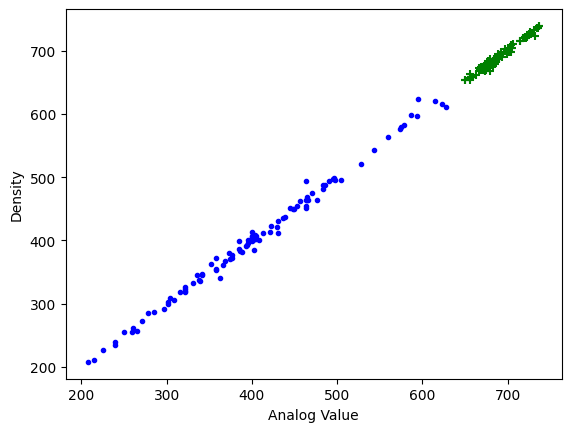

In [8]:
import matplotlib.pyplot as plt
plt.scatter(left["AnalogValue"], left["Density"], color = "green", marker = "+")
plt.scatter(right["AnalogValue"], right["Density"], color = "blue", marker = ".")
plt.xlabel("Analog Value")
plt.ylabel("Density")
plt.show()

In [9]:
upper_down = pd.concat([upper,down])
upper_down.tail()

,AnalogValue,Density,Amplitude,Result
295,820,807,1.00,1
296,796,795,0.97,1
297,779,779,0.95,1
298,768,774,0.94,1
299,756,755,0.92,1


In [10]:
upper_down_right = pd.concat([upper_down , right])
upper_down_right.tail()

,AnalogValue,Density,Amplitude,Result
495,240,235,0.29,2
496,240,240,0.29,2
497,225,227,0.27,2
498,215,211,0.26,2
499,208,208,0.25,2


In [11]:
upper_down_right_left = pd.concat([upper_down_right, left])
upper_down_right_left.tail()

,AnalogValue,Density,Amplitude,Result
695,656,663,0.80,3
696,671,672,0.82,3
697,675,669,0.82,3
698,678,676,0.83,3
699,677,679,0.83,3


In [12]:
upper_down_right_left = upper_down_right_left.reset_index(drop= True)

In [13]:
upper_down_right_left.to_csv("Single_data.csv")

In [14]:
data_point = upper_down_right_left

In [15]:
data_point.head()

,AnalogValue,Density,Amplitude,Result
0,587,579,0.72,0
1,589,592,0.72,0
2,605,603,0.74,0
3,624,627,0.76,0
4,622,622,0.76,0


In [16]:
X = data_point.iloc[:,:-1]
y = data_point.iloc[:,-1]
X.head()

,AnalogValue,Density,Amplitude
0,587,579,0.72
1,589,592,0.72
2,605,603,0.74
3,624,627,0.76
4,622,622,0.76


In [17]:
X.shape


(400, 3)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [19]:
X

array([[0.37599206, 0.36878728, 0.38211382],
       [0.37797619, 0.38170974, 0.38211382],
       [0.39384921, 0.39264414, 0.39837398],
       ...,
       [0.46329365, 0.4582505 , 0.46341463],
       [0.46626984, 0.46520875, 0.47154472],
       [0.46527778, 0.46819085, 0.47154472]])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
print("shape of x_train",X_train.shape)
print("shape of y_train", y_train.shape)


shape of x_train (320, 3)
shape of y_train (320,)


In [45]:
# from keras.utils import to_categorical
from keras.utils import to_categorical

# Convert y_train to one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Check the shape
print(y_train.shape)



(320, 4)


In [66]:
print("Shape of the X_train:", X_train.shape)
print("Shape of the y_train:", y_train.shape)

Shape of the X_train: (320, 3, 1)
Shape of the y_train: (320, 4)


Text(0.5, 1.0, 'Upper & Down')

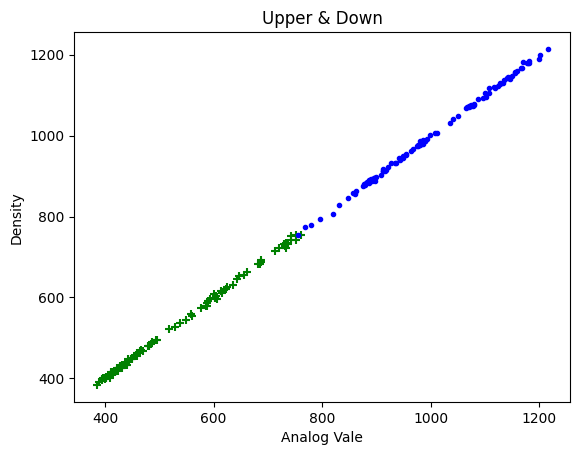

In [24]:
plt.scatter(upper["AnalogValue"], upper["Density"], color= "green", marker = "+")
plt.scatter(down["AnalogValue"], down["Density"], color = "blue", marker = ".")
plt.xlabel("Analog Vale")
plt.ylabel("Density")
plt.title("Upper & Down")

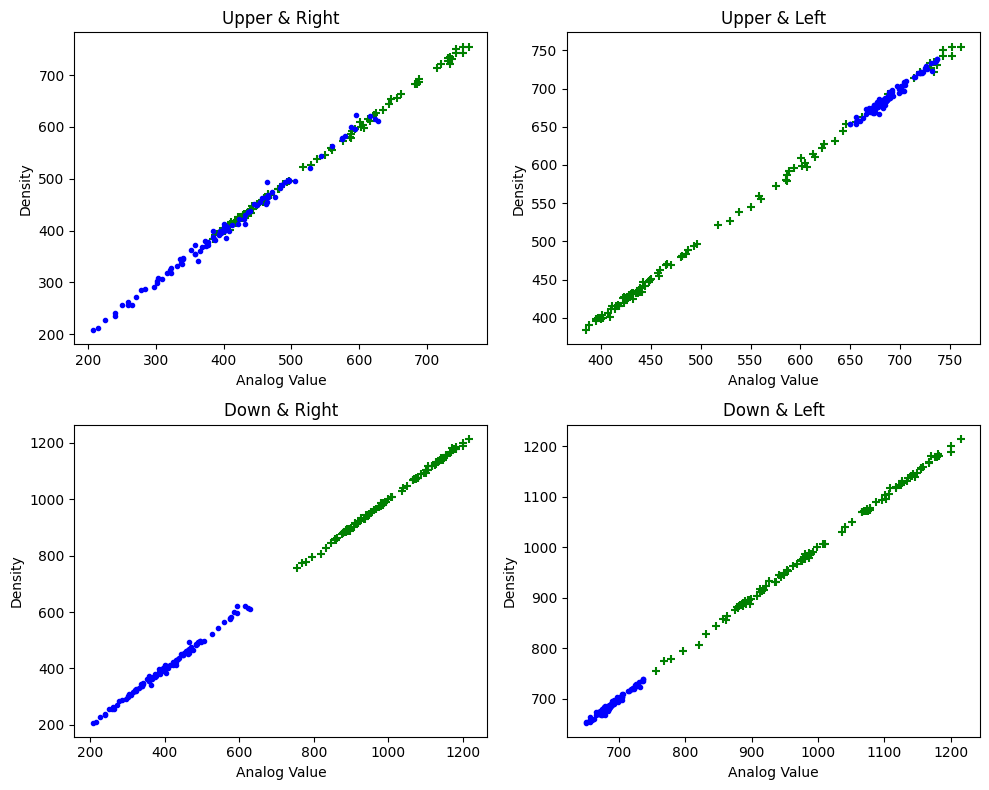

In [25]:
plt.figure(figsize=(10, 8))

# Upper & Right
plt.subplot(2, 2, 1)
plt.scatter(upper["AnalogValue"], upper["Density"], color="green", marker="+")
plt.scatter(right["AnalogValue"], right["Density"], color="blue", marker=".")
plt.xlabel("Analog Value")
plt.ylabel("Density")
plt.title("Upper & Right")

# Upper & Left
plt.subplot(2, 2, 2)
plt.scatter(upper["AnalogValue"], upper["Density"], color="green", marker="+")
plt.scatter(left["AnalogValue"], left["Density"], color="blue", marker=".")
plt.xlabel("Analog Value")
plt.ylabel("Density")
plt.title("Upper & Left")

# Down & Right
plt.subplot(2, 2, 3)
plt.scatter(down["AnalogValue"], down["Density"], color="green", marker="+")
plt.scatter(right["AnalogValue"], right["Density"], color="blue", marker=".")
plt.xlabel("Analog Value")
plt.ylabel("Density")
plt.title("Down & Right")

# Down & Left
plt.subplot(2, 2, 4)
plt.scatter(down["AnalogValue"], down["Density"], color="green", marker="+")
plt.scatter(left["AnalogValue"], left["Density"], color="blue", marker=".")
plt.xlabel("Analog Value")
plt.ylabel("Density")
plt.title("Down & Left")

plt.tight_layout()
plt.show()


In [61]:

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [62]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D

# model = Sequential()

# model.add(LSTM(units=64, return_sequences=True, input_shape=(3, 1)))
# model.add(Dropout(0.1)) #dropout rate = 20%

# model.add(LSTM(units = 63, return_sequences = True))
# model.add(Dropout(0.1))

# model.add(LSTM(units = 63, return_sequences = True))
# model.add(Dropout(0.1))

# model.add(LSTM(units = 64))
# model.add(Dropout(0.1))

# model.add(Dense(units = 90))
# model.add(Dense(units = 64))
# model.add(Dense(units = 128))

# model.add(Dense(units = 4, activation="softmax")) #4 as the output classes
# model.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics=["accuracy"]) #***
# model.summary()

In [63]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))


model.add(Dense(units=128, activation='tan'))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 32)             128       
                                                                 
 lstm_18 (LSTM)              (None, 1, 64)             24832     
                                                                 
 dropout_18 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_19 (LSTM)              (None, 1, 64)             33024     
                                                                 
 dropout_19 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_20 (LSTM)              (None, 1, 64)             33024     
                                                                 
 dropout_20 (Dropout)        (None, 1, 64)            

In [64]:
from keras.callbacks import EarlyStopping

# Create the EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=5)

In [65]:
model.fit(X_train , y_train, epochs = 100, callbacks=[early_stopping])

Epoch 1/100


ValueError: in user code:

    File "C:\Users\UNKNOWN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\UNKNOWN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\UNKNOWN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\UNKNOWN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\UNKNOWN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\UNKNOWN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\UNKNOWN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\UNKNOWN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\UNKNOWN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\UNKNOWN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 4) and (32, 1, 4) are incompatible
